# Calculate statistics and visualize results

In [1]:
import sys

sys.path.insert(0, '/home/sebastian/workspace/abcd_paper')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
mpl.rcParams['svg.fonttype'] = 'none' # Takes care that texts show up when 
# importing pdf-plots into Inkcape

from src.data import var_names
from src.definitions import REPO_ROOT, PROCESSED_DATA_DIR, RAW_DATA_DIR, RESULTS_DIR

In [3]:
abcd_data = pd.read_csv(PROCESSED_DATA_DIR / 'abcd_data.csv')
abcd_data = abcd_data.dropna(
    subset=var_names.all_brain_features.features + var_names.diagnoses.features + var_names.sociodem.features,
)  # NaNs are dropped in the study in the RepeatedStratifiedKFoldDataloader

## Calculate descriptive statistics

In [4]:
print(f"Total number of analyzed subjects: {len(abcd_data)}")
print(f"Age: {abcd_data['age'].mean():.2f} ({abcd_data['age'].min()}-{abcd_data['age'].max()})")
print(f"Proportion female: {len(abcd_data[abcd_data['female'] == 1]) / len(abcd_data):.3f}")

Total number of analyzed subjects: 6916
Age: 119.03 (108-131)
Proportion female: 0.477


## Make charts for sociodemographic characteristics

In [5]:
# Define plotting variables
main_color = sns.color_palette()[0]
label_size = 24
tick_size = 18
tick_rotation = 45
annotation_size = 16

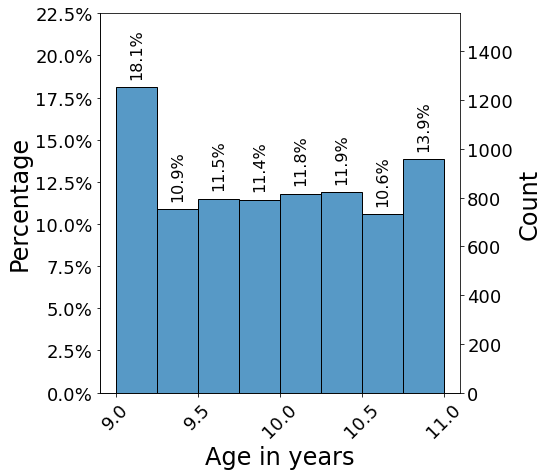

In [6]:
ylim_percentage=0.225
ylim_count = ylim_percentage * len(abcd_data)

ax = sns.displot(
    data=abcd_data['age'] / 12,
    binwidth=0.25,
    stat='probability',
    height=6,
    color=main_color
)
ax2 = ax.ax.twinx()

ax2.yaxis.tick_right()
ax.ax.yaxis.tick_left()

ax.ax.yaxis.set_label_position('left')

ax.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.ax.set_ylim(0, ylim_percentage)
ax2.set_ylim(0, ylim_count)

ax2.set_ylabel('Count', size=label_size)
ax.ax.set_ylabel('Percentage', size=label_size)
ax.ax.set_xlabel('Age in years', size=label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax.ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.ax.tick_params(axis='x', labelrotation=tick_rotation)

for p in ax.ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.ax.annotate(
        '{:.1f}%'.format(100.*y),
        (x.mean(), y+0.005),
        ha='center',
        va='bottom',
        size=annotation_size,
        rotation=90
    )

plt.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'supplement_2' / 'age_hist.pdf',
    bbox_inches='tight',
    dpi=300
)

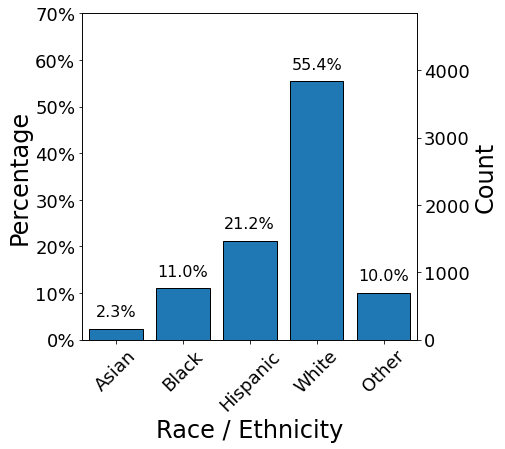

In [7]:
race_labels = [
    'race_ethnicity_Asian',
    'race_ethnicity_Black',
    'race_ethnicity_Hispanic',
    'race_ethnicity_White',
    'race_ethnicity_Other'
]
percentages = []
for r in race_labels:
    percentages.append(abcd_data[r].sum() / len(abcd_data))

ylim_percentage = 0.7
ylim_count = ylim_percentage * len(abcd_data)

fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(
    ax=ax,
    y=percentages,
    x=race_labels,
    linewidth=1,
    edgecolor='black',
    facecolor=main_color
)

ax2 = ax.twinx()

ax2.yaxis.tick_right()
ax.yaxis.tick_left()

ax.yaxis.set_label_position('left')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))

ax.set_ylim(0, ylim_percentage)
ax2.set_ylim(0, ylim_count)

ax2.set_ylabel('Count', size=label_size)
ax.set_ylabel('Percentage', size=label_size)
ax.set_xlabel('Race / Ethnicity', size=label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='x', labelrotation=tick_rotation)

ax.set_xticklabels(['Asian', 'Black', 'Hispanic', 'White', 'Other'])

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(
        '{:.1f}%'.format(100.*y),
        (x.mean(), y+0.02),
        ha='center',
        va='bottom',
        size=annotation_size
    )

plt.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'supplement_2' / 'race_bars.pdf',
    bbox_inches='tight',
    dpi=300
)

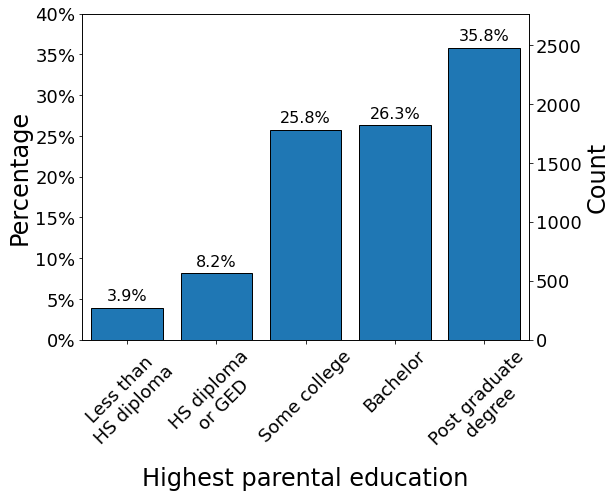

In [8]:
educ_labels = [
    'high.educ_< HS Diploma',
    'high.educ_HS Diploma/GED',
    'high.educ_Some College',
    'high.educ_Bachelor',
    'high.educ_Post Graduate Degree'
]
percentages = []
for e in educ_labels:
    percentages.append(abcd_data[e].sum() / len(abcd_data))

ylim_percentage=0.4
ylim_count = ylim_percentage * len(abcd_data)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    ax=ax,
    y=percentages,
    x=educ_labels,
    linewidth=1,
    edgecolor='black',
    facecolor=main_color
)
ax2 = ax.twinx()

ax2.yaxis.tick_right()
ax.yaxis.tick_left()

ax.yaxis.set_label_position('left')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))

ax.set_ylim(0, ylim_percentage)
ax2.set_ylim(0, ylim_count)

ax2.set_ylabel('Count', size=label_size)
ax.set_ylabel('Percentage', size=label_size)
ax.set_xlabel('Highest parental education', size=label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='x', labelrotation=tick_rotation)

ax.set_xticklabels([
    'Less than\nHS diploma',
    'HS diploma\nor GED',
    'Some college',
    'Bachelor',
    'Post graduate\ndegree'
])

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(
        '{:.1f}%'.format(100.*y),
        (x.mean(), y+0.005),
        ha='center',
        va='bottom',
        size=annotation_size
    )

plt.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'supplement_2' / 'educ_bars.pdf',
    bbox_inches='tight',
    dpi=300
)

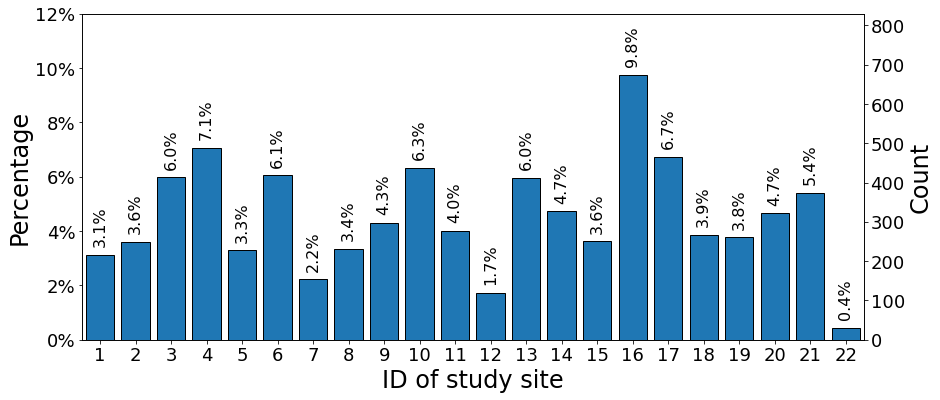

In [9]:
site_labels = [
    'abcd_site_site01',
    'abcd_site_site02',
    'abcd_site_site03',
    'abcd_site_site04',
    'abcd_site_site05',
    'abcd_site_site06',
    'abcd_site_site07',
    'abcd_site_site08',
    'abcd_site_site09',
    'abcd_site_site10',
    'abcd_site_site11',
    'abcd_site_site12',
    'abcd_site_site13',
    'abcd_site_site14',
    'abcd_site_site15',
    'abcd_site_site16',
    'abcd_site_site17',
    'abcd_site_site18',
    'abcd_site_site19',
    'abcd_site_site20',
    'abcd_site_site21',
    'abcd_site_site22'
]
percentages = []
for s in site_labels:
    percentages.append(abcd_data[s].sum() / len(abcd_data))

ylim_percentage=0.12
ylim_count = ylim_percentage * len(abcd_data)

fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(
    ax=ax,
    y=percentages,
    x=site_labels,
    linewidth=1,
    edgecolor='black',
    facecolor=main_color
)
ax2 = ax.twinx()

ax2.yaxis.tick_right()
ax.yaxis.tick_left()

ax.yaxis.set_label_position('left')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 0))

ax.set_ylim(0, ylim_percentage)
ax2.set_ylim(0, ylim_count)

ax2.set_ylabel('Count', size=label_size)
ax.set_ylabel('Percentage', size=label_size)
ax.set_xlabel('ID of study site', size=label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)

ax.set_xticklabels(list(range(1, 23)))

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(
        '{:.1f}%'.format(100.*y),
        (x.mean(), y+0.003),
        ha='center',
        va='bottom',
        size=annotation_size,
        rotation=90
    )

plt.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'supplement_2' / 'site_bars.pdf',
    bbox_inches='tight',
    dpi=300
)

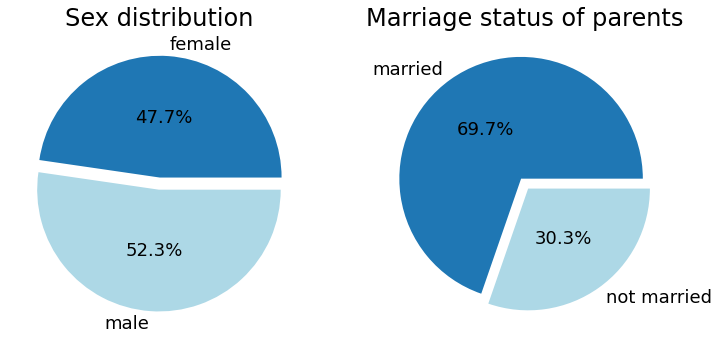

In [10]:
pie_options = {
    'autopct': "%.1f%%",
    'explode': [0.05]*2,
    'pctdistance': 0.5,
    'textprops': {'fontsize': tick_size},
    'colors': [sns.color_palette()[0], 'lightblue']
}

pie, axes = plt.subplots(1, 2, figsize=[12, 6])
sex_labels = ['female', 'male']
sex_dist = [
    sum(abcd_data['female']),
    len(abcd_data) - sum(abcd_data['female'])
]
married_labels = ['married', 'not married']
married_dist = [
    sum(abcd_data['married']),
    len(abcd_data) - sum(abcd_data['married'])
]
axes[0].pie(
    x=sex_dist,
    labels=sex_labels,
    **pie_options
)
axes[0].set_title('Sex distribution', fontsize=label_size)
axes[1].pie(
    x=married_dist,
    labels=married_labels,
    **pie_options
)
axes[1].set_title('Marriage status of parents', fontsize=label_size)

pie.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'supplement_2' / 'pies.pdf',
    bbox_inches='tight',
    dpi=300
)

## Make prevalence and concordance chart

In [11]:
pd.DataFrame({
    "Total": abcd_data.loc[:, var_names.diagnoses.features].sum(),
    "Percentage": (abcd_data.loc[:, var_names.diagnoses.features].mean() * 100).round(2),
})

,Total,Percentage
Major Depressive Disorder,325.0,4.70
Bipolar Disorder,488.0,7.06
Psychotic Symptoms,181.0,2.62
ADHD,1296.0,18.74
Oppositional Defiant Disorder,1025.0,14.82
Conduct Disorder,200.0,2.89
PTSD,137.0,1.98
Obsessive Compulsive Disorder,648.0,9.37
Generalized Anxiety Disorder,368.0,5.32
Social Anxiety Disorder,371.0,5.36


In [12]:
"""Based on work by Sebastian Pölsterl https://github.com/sebp"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


def index_to_binary_matrix(index):
    return index.to_series().apply(lambda x: pd.Series(map(int, x.split(":")), name=x))


class ConcordancePlot:
    """Plot concordance rates of diagnoses"""

    def __init__(self, data, label=None, sort_by_prev=True):
        """
        :type data: pandas.DataFrame
        :param label: Label of the data
        :type label: str
        :param sort_by_prev: Whether to sort columns by
        prevalence of concordance instance
        """
        self.data = data
        self.label = label
        self.sort_by_prev = sort_by_prev

    def get_prevalences(self):
        """
        :rtype: pandas.Series
        """
        prev = self.data.apply(lambda x: x.sum(), axis=0)
        return prev

    def get_combinations(self):
        """
        :rtype: pandas.DataFrame
        """
        miss_patterns = self.data.astype(int).apply(
            lambda x: ":".join([str(v) for v in x]),
            axis=1
        )
        counts = miss_patterns.value_counts()
        percentage = counts / self.data.shape[0]

        df = pd.DataFrame({"Count": counts, "Percent": percentage})
        assert df["Count"].sum() == self.data.shape[0]
        return df

    def plot_combinations(self,
                          ax,
                          #ax2,
                          max_patterns=None,
                          **fig_kw):
        """Plot combinations of diagnoses"""
        prevs = self.get_prevalences()
        combs = self.get_combinations()
        if max_patterns is not None:
            combs = combs.head(max_patterns)

        binary_mat = index_to_binary_matrix(combs.index)

        if self.sort_by_prev:
            o = np.argsort(-prevs.values)
            data = binary_mat.iloc[:, o]
            yticklabels = prevs.iloc[o].index.tolist()
        else:
            data = binary_mat.iloc[:, :]
            yticklabels = prevs.index.tolist()

        sns.heatmap(
            data.T,
            yticklabels=yticklabels,
            cbar=False,
            xticklabels=[f'{v:.1%}' for v in combs['Percent']],
            linewidths=.1,
            ax=ax,
            cmap=sns.color_palette(['whitesmoke', sns.color_palette()[0]])
        )
        ax.set_title(
            "Most common concordances of\ndiagnoses and their prevalences",
            size=label_size
        )
        ax.set_xlabel('Prevalence', size=label_size)
        for t in ax.get_xticklabels():
            t.set_rotation(90)
            t.set_size(tick_size)
        #if self.label is not None:
        #    ax.set_xlabel(self.label)

        #pos = ax1.get_xticks()
        #percent = combs["Percent"]
        #ax2.bar(pos, height=percent, width=0.9, align="center")
        #ax2.set_ylim(0, 0.08)
        #ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, 1))
        #ax2.xaxis.grid(False)
        #ax2.invert_yaxis()
        #ax1.xaxis.set_visible(False)
        #ax2.xaxis.set_visible(False)
        ax1.yaxis.set_visible(False)
        #ax2.set_ylabel("Percentage")
        #ax2.yaxis.set_label_position('right')

        #ax3 = ax2.twinx()
        #ax3.set_xticks(pos)
        #ax3.set_xlim(ax2.get_xlim())
        #ax3.set_xticklabels([f'{v:.1%}' for v in percent])
        #ax3.xaxis.grid(False)
        #ax3.yaxis.set_visible(False)
        #return fig

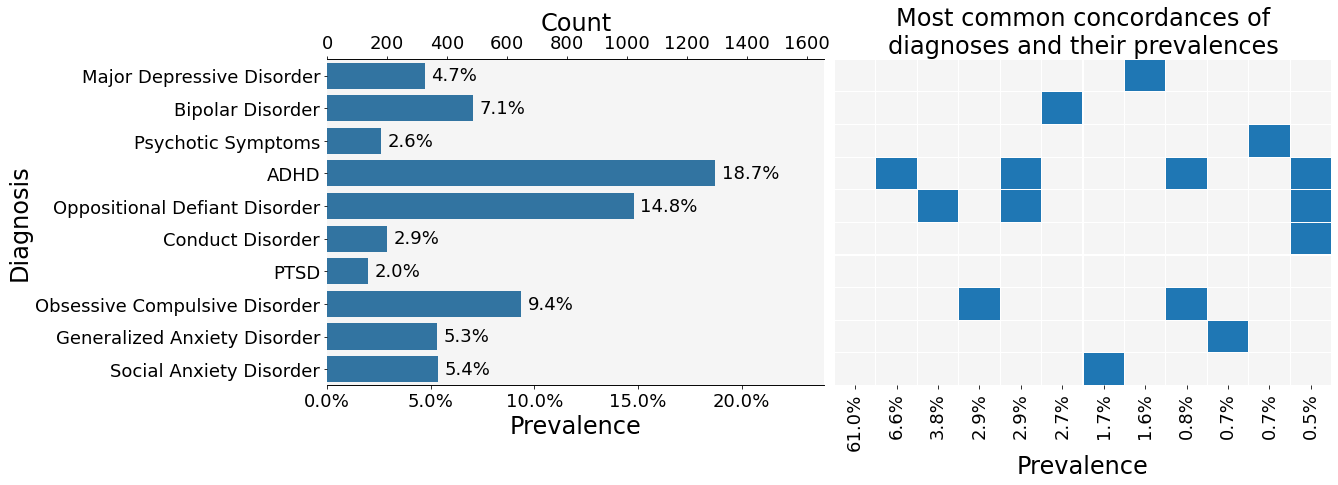

In [13]:
percentages = []
for d in var_names.diagnoses.features:
    percentages.append(abcd_data[d].sum() / len(abcd_data))

ylim_percentage = 0.24
ylim_count = ylim_percentage * len(abcd_data)

fig, (ax0, ax1) = plt.subplots(
    figsize=(18, 6), nrows=1, ncols=2,
    gridspec_kw = {
        'hspace': 0.05,
        'wspace': 0.02
    }
)
sns.barplot(
    ax=ax0,
    x=percentages,
    y=var_names.diagnoses.features,
    color=sns.color_palette()[0]
)
ax0_count = ax0.twiny()

ax0_count.xaxis.tick_top()
ax0.xaxis.tick_bottom()

ax0.xaxis.set_label_position('bottom')
ax0_count.xaxis.set_label_position('top')

ax0.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, 1))

ax0.set_xlim(0, ylim_percentage)
ax0_count.set_xlim(0, ylim_count)

ax0_count.set_xlabel('Count', size=label_size)
ax0.set_xlabel('Prevalence', size=label_size)
ax0.set_ylabel('Diagnosis', size=label_size)
ax0_count.tick_params(axis='both', which='major', labelsize=tick_size)
ax0.tick_params(axis='both', which='major', labelsize=tick_size)

ax0.set_yticklabels(
    var_names.diagnoses.features,
    size=tick_size
)
ax0.set_facecolor('whitesmoke')

for p in ax0.patches:
    y=p.get_bbox().get_points()[:,1]
    x=p.get_bbox().get_points()[1,0]
    ax0.annotate(
        '{:.1f}%'.format(100.*x),
        (x+0.003, y.mean()),
        ha='left',
        va='center',
        size=tick_size
    )

cp = ConcordancePlot(
    abcd_data[var_names.diagnoses.features],
    sort_by_prev=False
)
cp.plot_combinations(max_patterns=12, ax=ax1, ax2=ax1)

ax2.axis('off')
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0_count.spines['right'].set_visible(False)
ax0_count.spines['left'].set_visible(False)

# ax1.spines['top'].set_visible(True)
# ax1.spines['bottom'].set_visible(True)

plt.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'prevalences.pdf',
    bbox_inches='tight',
    dpi=300
)

## Make ROC AUC violinplots

In [14]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
mpl.rcParams['svg.fonttype'] = 'none' # Takes care that texts show up when 
# importing pdf-plots into Inkcape

import src.data.var_names as var_names
from src.definitions import REPO_ROOT, PROCESSED_DATA_DIR, RAW_DATA_DIR

In [15]:
%load_ext autoreload
%autoreload 2
from src.visualization.viz import (
    load_test_auc_data, load_test_auc_unadjusted_data, auc_violinplot, permutation_test
)

Load mean AUCs on unpermuted and permuted datasets.

In [16]:
mean_unpermuted_aucs, permuted_aucs_values, unpermuted_aucs_values = load_test_auc_data(
    methods=[
        'xgboost_cce', 'logistic_regression_cce', 'logistic_regression_ovr'
    ]
)

In [17]:
# Apply Bonferroni correction to original alpha of 0.05. We are performing
# 16 permutation tests.
alpha=0.05 / 16

permuted_aucs=permuted_aucs_values
unpermuted_aucs=mean_unpermuted_aucs
methods_to_plot=['xgboost_cce', 'logistic_regression_ovr']
xlims=(0.375, 0.675)
alpha=alpha

Load unadjusted

In [18]:
methods = ['logistic_regression_ovr', 'xgboost_cce']

mean_unperm_unadj_aucs, unperm_unadj_aucs = load_test_auc_unadjusted_data(methods)

Plot as violinplots.

/home/sebastian/miniconda3/envs/abcd/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


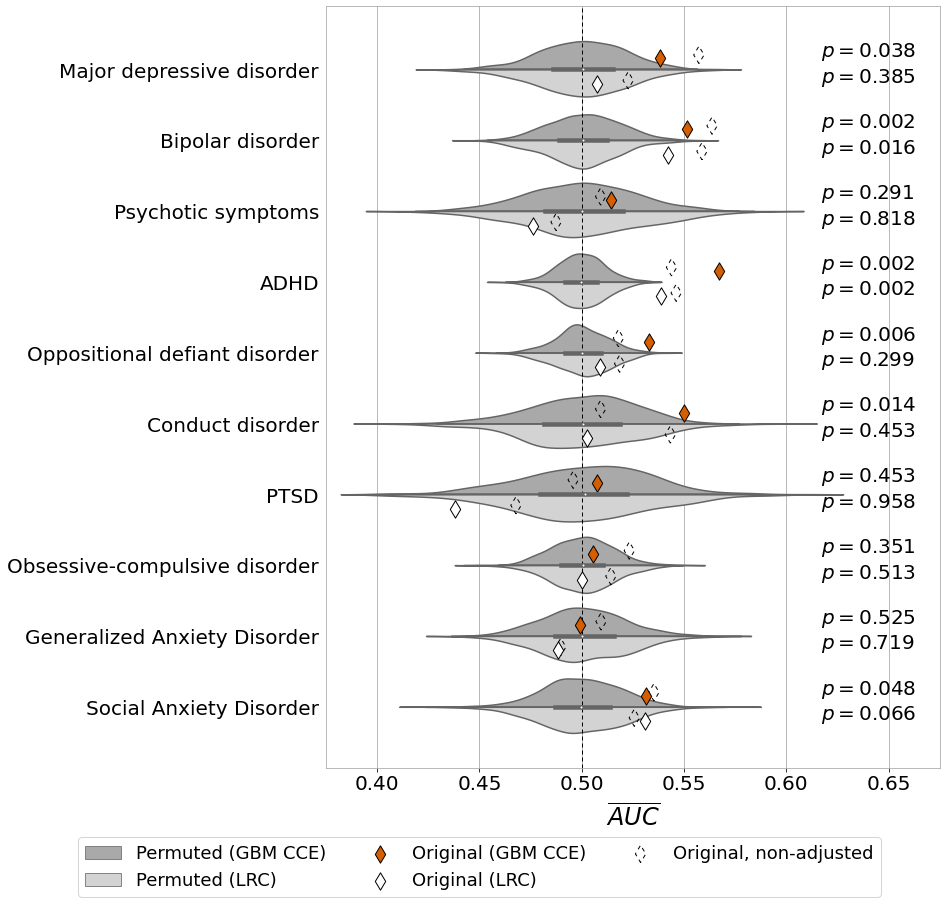

In [19]:
from typing import Tuple
from src.definitions import okabe_ito_palette

"""Displays and returns violinplot of ROC AUC values

Args:
    permuted_aucs: AUC values of predictions on permuted datasets (generated
        by 'load_test_auc_data')
    unpermuted_aucs: AUC values of predictions on original dataset
        (generated by 'load_test_auc_data')
    methods_to_plot: List of exactly two methods that should be plotted.
        Methods must occur in permuted_aucs['Method'] and be a key in
        permuted_aucs.
    xlims: Range of AUC values to plot
    alpha: Significance level alpha. p-values will be printed bold when they
        are below this number.

Returns:
    Violin plot
"""

if len(methods_to_plot) != 2:
    raise ValueError('methods_to_plot must contain exactly two elements!')

# Change labels for legend annotations
new_labels = {
    'logistic_regression_ovr': 'LRC',
    'logistic_regression_cce': 'LR CCE',
    'xgboost_cce': 'GBM CCE',
}
_permuted_aucs = permuted_aucs[
    permuted_aucs['Method'].isin(methods_to_plot)
]
for old, short in new_labels.items():
    _permuted_aucs.loc[
        _permuted_aucs['Method'] == old, 'Method'
    ] = f'Permuted ({short})'
colors = ['darkgrey', 'lightgrey']
colors_bars = [okabe_ito_palette['vermillion'], 'white']

# Plot violinplots of permuted dataset AUCs
fig = plt.figure(figsize=(11, 14))
#sns.set_style(style='whitegrid')
ax = sns.violinplot(
    y='Diagnosis',
    x='mean_auc',
    hue='Method',
    data=_permuted_aucs,
    palette=colors,
    whis=4,
    orient='h',
    hue_order=[f'Permuted ({new_labels[m]})' for m in methods_to_plot],
    zorder=1,
    split=True
)

# Plot adjustments
# Style
ax_color = 'darkgray'
ax.spines['bottom'].set_color(ax_color)
ax.spines['top'].set_color(ax_color)
ax.spines['right'].set_color(ax_color)
ax.spines['left'].set_color(ax_color)
ax.set_axisbelow(True)
ax.grid(color=ax_color, axis='x')
ax.set_xlim(xlims)
ax.set_xlabel('$\\overline{AUC}$', fontsize=24, labelpad=10)  # '$\\overline{AUC}$'
ax.set_ylabel('')
ax.set_yticklabels([
    'Major depressive disorder',
    'Bipolar disorder',
    'Psychotic symptoms',
    'ADHD',
    'Oppositional defiant disorder',
    'Conduct disorder',
    'PTSD',
    'Obsessive-compulsive disorder',
    'Generalized Anxiety Disorder',
    'Social Anxiety Disorder',
])
ax.tick_params(labelsize=20, left=False)
ax.axvline(
    x=0.5, linestyle=(0, (4, 3)), linewidth=1, color='black', zorder=1.5
)
y_offset = 0.18
markersize = 150
marker = 'd'

# Plot AUCs of original datasets
for i, diagnosis in enumerate(permuted_aucs['Diagnosis'].unique()):
    for j, method in enumerate(methods_to_plot):
        plt.scatter(
            x=unpermuted_aucs[method][diagnosis],
            y=i - y_offset + j * 2 * y_offset + 0.025,
            facecolors=colors_bars[j],
            edgecolors='black',
            alpha=1,
            marker=marker,
            s=markersize,
            zorder=2,
            label=f'Original ({new_labels[method]})' if i == 0 else None
        )
for i, diagnosis in enumerate(permuted_aucs['Diagnosis'].unique()):
    for j, method in enumerate(methods_to_plot):
        plt.scatter(
            x=mean_unperm_unadj_aucs[method][diagnosis],
            y=i - y_offset + j * 2 * y_offset - 0.025,
            facecolors='None',
            edgecolors='black',
            linestyle=(3, (4, 4)),
            alpha=1,
            marker=marker,
            s=markersize,
            zorder=1,
            label=f'Original, non-adjusted' if i == 0 and j == 0 else None
        )

#Show p-values
def mark_significance(p_val: float) -> Tuple[str, str]:
    if p_val <= alpha:
        str1 = '\\pmb{{'
        str2 = '}}'
    else:
        str1 = str2 = ''
    return str1, str2

p_values = permutation_test(permuted_aucs, unpermuted_aucs)
for i, diagnosis in enumerate(permuted_aucs['Diagnosis'].unique()):
    for j, method in enumerate(methods_to_plot):
        plt.annotate(
            text=f'$p = {p_values[method][diagnosis]:.3f}$',
            #text=f'$p = {str1}{p_values[method][diagnosis]:.3f}{str2}$',
            xy=(0.617, i - y_offset + j * 2 * y_offset),
            size=20
        )

ax.legend(loc='upper center', bbox_to_anchor=(0.25, -0.08), fontsize=18, ncol=3)
plt.show()

fig.savefig(
    REPO_ROOT / 'reports' / 'figures' / 'violinplot_freesurfer.pdf',
    bbox_inches='tight',
    dpi=300
)

## Show mean and range of AUCs on original dataset

In [20]:
data_frames = []

for method, dic in unpermuted_aucs_values.items():
    aucs = pd.DataFrame(dic)
    summary = pd.DataFrame({
        "mean": aucs.mean(),
        "min": aucs.min(),
        "max": aucs.max(),
    })
    summary.columns = pd.MultiIndex.from_product([(method,), summary.columns])

    data_frames.append(summary)

pd.concat(data_frames, axis=1).round(3)

xgboost_cce                \
                                     mean    min    max   
Major Depressive Disorder           0.538  0.453  0.614   
Bipolar Disorder                    0.551  0.487  0.620   
Psychotic Symptoms                  0.514  0.382  0.639   
ADHD                                0.567  0.523  0.608   
Oppositional Defiant Disorder       0.533  0.478  0.573   
Conduct Disorder                    0.550  0.407  0.670   
PTSD                                0.508  0.369  0.610   
Obsessive Compulsive Disorder       0.506  0.447  0.563   
Generalized Anxiety Disorder        0.499  0.429  0.573   
Social Anxiety Disorder             0.531  0.446  0.610   

                              logistic_regression_cce                \
                                                 mean    min    max   
Major Depressive Disorder                       0.502  0.412  0.567   
Bipolar Disorder                                0.537  0.471  0.593   
Psychotic Symptoms                              0.506  0.375  0.646   
ADHD                                            0.529  0.477  0.577   
Oppositional Defiant Disorder                   0.517  0.479  0.564   
Conduct Disorder                                0.528  0.428  0.636   
PTSD                                            0.475  0.331  0.584   
Obsessive Compulsive Disorder                   0.508  0.453  0.568   
Generalized Anxiety Disorder                    0.498  0.421  0.588   
Social Anxiety Disorder                         0.532  0.450  0.619   

                              logistic_regression_ovr                
                                                 mean    min    max  
Major Depressive Disorder                       0.507  0.409  0.579  
Bipolar Disorder                                0.542  0.490  0.611  
Psychotic Symptoms                              0.476  0.349  0.600  
ADHD                                            0.539  0.483  0.582  
Oppositional Defiant Disorder                   0.509  0.462  0.557  
Conduct Disorder                                0.503  0.388  0.628  
PTSD                                            0.438  0.328  0.574  
Obsessive Compulsive Disorder                   0.500  0.450  0.560  
Generalized Anxiety Disorder                    0.488  0.417  0.575  
Social Anxiety Disorder                         0.531  0.466  0.595

## Show difference in mean adjusted - unadjusted

In [21]:
methods_selected = list(mean_unperm_unadj_aucs.keys())

auc_unadj = pd.DataFrame(mean_unperm_unadj_aucs).loc[:, methods_selected]
auc_unadj.columns = pd.MultiIndex.from_product([("unadjusted",), auc_unadj.columns])

auc_adj = pd.DataFrame(mean_unpermuted_aucs).loc[:, methods_selected]
auc_adj.columns = pd.MultiIndex.from_product([("adjusted",), auc_adj.columns])

auc_diff = auc_unadj.xs("unadjusted", axis=1) - auc_adj.xs("adjusted", axis=1)
auc_diff.columns = pd.MultiIndex.from_product([("unadjusted - adjusted",), auc_diff.columns])

auc_compare = pd.concat((auc_diff, auc_adj, auc_unadj), axis=1)

auc_compare.round(3)

unadjusted - adjusted              \
                              logistic_regression_ovr xgboost_cce   
Major Depressive Disorder                       0.015       0.019   
Bipolar Disorder                                0.017       0.012   
Psychotic Symptoms                              0.011      -0.005   
ADHD                                            0.007      -0.023   
Oppositional Defiant Disorder                   0.010      -0.015   
Conduct Disorder                                0.041      -0.041   
PTSD                                            0.030      -0.012   
Obsessive Compulsive Disorder                   0.014       0.018   
Generalized Anxiety Disorder                    0.002       0.010   
Social Anxiety Disorder                        -0.005       0.004   

                                             adjusted              \
                              logistic_regression_ovr xgboost_cce   
Major Depressive Disorder                       0.507       0.538   
Bipolar Disorder                                0.542       0.551   
Psychotic Symptoms                              0.476       0.514   
ADHD                                            0.539       0.567   
Oppositional Defiant Disorder                   0.509       0.533   
Conduct Disorder                                0.503       0.550   
PTSD                                            0.438       0.508   
Obsessive Compulsive Disorder                   0.500       0.506   
Generalized Anxiety Disorder                    0.488       0.499   
Social Anxiety Disorder                         0.531       0.531   

                                           unadjusted              
                              logistic_regression_ovr xgboost_cce  
Major Depressive Disorder                       0.523       0.557  
Bipolar Disorder                                0.559       0.564  
Psychotic Symptoms                              0.488       0.509  
ADHD                                            0.546       0.544  
Oppositional Defiant Disorder                   0.519       0.518  
Conduct Disorder                                0.543       0.509  
PTSD                                            0.468       0.496  
Obsessive Compulsive Disorder                   0.514       0.523  
Generalized Anxiety Disorder                    0.490       0.509  
Social Anxiety Disorder                         0.526       0.535

## Make list of features for supplement

In [22]:
sri24_features_info = pd.read_csv(RAW_DATA_DIR / 'btsv01.txt', sep='\t').iloc[0]
sri24_features_info

/home/sebastian/miniconda3/envs/abcd/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


collection_id                                                      collection_id
btsv01_id                                                              btsv01_id
dataset_id                                                            dataset_id
subjectkey                     The NDAR Global Unique Identifier (GUID) for r...
src_subject_id                        Subject ID how it's defined in lab/project
                                                     ...                        
sri24vtlslateralvtlrcsf        right lateral ventricle cerebral spinal fluid ...
sri24vtlsthirdvtllcsf          left third ventricle cerebral spinal fluid volume
sri24vtlsthirdvtlrcsf          right third ventricle cerebral spinal fluid vo...
sri24suptentsupratentoriumv                        suptent supratentorium volume
collection_title                                                collection_title
Name: 0, Length: 131, dtype: object

In [23]:
for f in var_names.sri24.features:
    print(sri24_features_info[f].capitalize())

Left precentral gyrus gray matter volume
Right precentral gyrus gray matter volume
Left superior frontal gyrus, dorsolater gray matter volume
Right superior frontal gyrus, dorsolater gray matter volume
Left superior frontal gyrus, orbital part gray matter volume
Right superior frontal gyrus, orbital part gray matter volume
Left middle frontal gyrus, lateral part gray matter volume
Right middle frontal gyrus, lateral part gray matter volume
Left middle frontal gyrus, orbital part gray matter volume
Right middle frontal gyrus, orbital part gray matter volume
Left opercular part of inferior frontal gyrus gray matter volume
Right opercular part of inferior frontal gyrus gray matter volume
Left area triangularis gray matter volume
Right area triangularis gray matter volume
Left orbital part of inferior frontal gyrus gray matter volume
Right orbital part of inferior frontal gyrus gray matter volume
Left rolandic operculum gray matter volume
Right rolandic operculum gray matter volume
Left su

In [24]:
for f in var_names.freesurfer.features:
    print(f)

FS_lh_bankssts_thickness
FS_lh_caudalanteriorcingulate_thickness
FS_lh_caudalmiddlefrontal_thickness
FS_lh_cuneus_thickness
FS_lh_entorhinal_thickness
FS_lh_fusiform_thickness
FS_lh_inferiorparietal_thickness
FS_lh_inferiortemporal_thickness
FS_lh_isthmuscingulate_thickness
FS_lh_lateraloccipital_thickness
FS_lh_lateralorbitofrontal_thickness
FS_lh_lingual_thickness
FS_lh_medialorbitofrontal_thickness
FS_lh_middletemporal_thickness
FS_lh_parahippocampal_thickness
FS_lh_paracentral_thickness
FS_lh_parsopercularis_thickness
FS_lh_parsorbitalis_thickness
FS_lh_parstriangularis_thickness
FS_lh_pericalcarine_thickness
FS_lh_postcentral_thickness
FS_lh_posteriorcingulate_thickness
FS_lh_precentral_thickness
FS_lh_precuneus_thickness
FS_lh_rostralanteriorcingulate_thickness
FS_lh_rostralmiddlefrontal_thickness
FS_lh_superiorfrontal_thickness
FS_lh_superiorparietal_thickness
FS_lh_superiortemporal_thickness
FS_lh_supramarginal_thickness
FS_lh_frontalpole_thickness
FS_lh_temporalpole_thickness


In [25]:
s = 'Banks superior temporal sulcus0.6230.733Caudal anterior-cingulate cortex0.7680.809Caudal middle frontal gyrus0.8970.907Cuneus cortex0.7670.797Entorhinal cortex0.8180.737Fusiform gyrus0.8120.880Inferior parietal cortex0.9350.960Inferior temporal gyrus0.8620.870Isthmus–cingulate cortex0.7290.729Lateral occipital cortex0.8730.900Lateral orbital frontal cortex0.8650.814Lingual gyrus0.8540.923Medial orbital frontal cortex0.8340.907Middle temporal gyrus0.8910.892Parahippocampal gyrus0.8570.804Paracentral lobule0.8390.861Pars opercularis0.8170.792Pars orbitalis0.6640.729Pars triangularis0.7450.819Pericalcarine cortex0.7320.623Postcentral gyrus0.9160.880Posterior-cingulate cortex0.8330.812Precentral gyrus0.9670.972Precuneus cortex0.8390.945Rostral anterior cingulate cortex0.8110.835Rostral middle frontal gyrus0.8780.908Superior frontal gyrus0.9650.977Superior parietal cortex0.9120.856Superior temporal gyrus0.9210.944Supramarginal gyrus0.9150.894Temporal pole0.6490.729Transverse temporal cortex0.7120.719'
lb = False
features = []
last = 0
for i, c in enumerate(s):
    if c.isdigit() or c == '.':
        if last >= 0:
            features.append(s[last:i])
        last = -1
    else:
        if last == -1:
            last = i

for f in features:
    print(f)

Banks superior temporal sulcus
Caudal anterior-cingulate cortex
Caudal middle frontal gyrus
Cuneus cortex
Entorhinal cortex
Fusiform gyrus
Inferior parietal cortex
Inferior temporal gyrus
Isthmus–cingulate cortex
Lateral occipital cortex
Lateral orbital frontal cortex
Lingual gyrus
Medial orbital frontal cortex
Middle temporal gyrus
Parahippocampal gyrus
Paracentral lobule
Pars opercularis
Pars orbitalis
Pars triangularis
Pericalcarine cortex
Postcentral gyrus
Posterior-cingulate cortex
Precentral gyrus
Precuneus cortex
Rostral anterior cingulate cortex
Rostral middle frontal gyrus
Superior frontal gyrus
Superior parietal cortex
Superior temporal gyrus
Supramarginal gyrus
Temporal pole
Transverse temporal cortex


In [26]:
s = """Banks superior temporal sulcus
Caudal anterior-cingulate cortex
Caudal middle frontal gyrus
Cuneus cortex
Entorhinal cortex
Fusiform gyrus
Inferior parietal cortex
Inferior temporal gyrus
Isthmus–cingulate cortex
Lateral occipital cortex
Lateral orbital frontal cortex
Lingual gyrus
Medial orbital frontal cortex
Middle temporal gyrus
Parahippocampal gyrus
Paracentral lobule
Pars opercularis
Pars orbitalis
Pars triangularis
Pericalcarine cortex
Postcentral gyrus
Posterior-cingulate cortex
Precentral gyrus
Precuneus cortex
Rostral anterior cingulate cortex
Rostral middle frontal gyrus
Superior frontal gyrus
Superior parietal cortex
Superior temporal gyrus
Supramarginal gyrus
Frontal pole
Temporal pole
Transverse temporal cortex
Insular cortex
Mean cortical"""

features = s.split('\n')
for i in range(len(features)):
    features[i] = features[i].lower()
features

['banks superior temporal sulcus',
 'caudal anterior-cingulate cortex',
 'caudal middle frontal gyrus',
 'cuneus cortex',
 'entorhinal cortex',
 'fusiform gyrus',
 'inferior parietal cortex',
 'inferior temporal gyrus',
 'isthmus–cingulate cortex',
 'lateral occipital cortex',
 'lateral orbital frontal cortex',
 'lingual gyrus',
 'medial orbital frontal cortex',
 'middle temporal gyrus',
 'parahippocampal gyrus',
 'paracentral lobule',
 'pars opercularis',
 'pars orbitalis',
 'pars triangularis',
 'pericalcarine cortex',
 'postcentral gyrus',
 'posterior-cingulate cortex',
 'precentral gyrus',
 'precuneus cortex',
 'rostral anterior cingulate cortex',
 'rostral middle frontal gyrus',
 'superior frontal gyrus',
 'superior parietal cortex',
 'superior temporal gyrus',
 'supramarginal gyrus',
 'frontal pole',
 'temporal pole',
 'transverse temporal cortex',
 'insular cortex',
 'mean cortical']

In [27]:
lh = []
for f in features:
    print(f'Right hemisphere {f} thickness')

Right hemisphere banks superior temporal sulcus thickness
Right hemisphere caudal anterior-cingulate cortex thickness
Right hemisphere caudal middle frontal gyrus thickness
Right hemisphere cuneus cortex thickness
Right hemisphere entorhinal cortex thickness
Right hemisphere fusiform gyrus thickness
Right hemisphere inferior parietal cortex thickness
Right hemisphere inferior temporal gyrus thickness
Right hemisphere isthmus–cingulate cortex thickness
Right hemisphere lateral occipital cortex thickness
Right hemisphere lateral orbital frontal cortex thickness
Right hemisphere lingual gyrus thickness
Right hemisphere medial orbital frontal cortex thickness
Right hemisphere middle temporal gyrus thickness
Right hemisphere parahippocampal gyrus thickness
Right hemisphere paracentral lobule thickness
Right hemisphere pars opercularis thickness
Right hemisphere pars orbitalis thickness
Right hemisphere pars triangularis thickness
Right hemisphere pericalcarine cortex thickness
Right hemisph

## How many features typically have variance less than 0.001?

In [55]:
from src.data.data_loader import RepeatedStratifiedKFoldDataloader

data_loader = RepeatedStratifiedKFoldDataloader(
    dataframe=abcd_data,
    features=var_names.all_brain_features.features,
    responses=var_names.diagnoses.features,
    confounders=var_names.sociodem.features,
    n=5,
    k=5,
    val_ratio=0.2,
    random_state=77
)

In [6]:
for i, (train, valid, test, features_selected) in enumerate(data_loader):
    print(f'n={len(var_names.sri24.features) + len(var_names.freesurfer.features) - len(features_selected)} features dropped')

C:\ProgramData\Anaconda3\envs\abcd\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped


C:\ProgramData\Anaconda3\envs\abcd\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped


C:\ProgramData\Anaconda3\envs\abcd\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped


C:\ProgramData\Anaconda3\envs\abcd\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped


C:\ProgramData\Anaconda3\envs\abcd\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
n=4 features dropped
